In [1]:
from solver import Solver
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Homogenenous
### Snapshots

In [2]:
## Configuration
h = 0.01
dt = 0.001
nx = nz = 200
rho = 2.0
vp = 4.7
vs = 3.5
nt = 500
f0 = 15
t0 = 0.1
sources_xz = np.array([
    [100, 100],
])
sol = Solver(rho, vp, vs, nx, nz, h, dt, nt, t0, f0, sources_xz)

In [3]:
## Propagation
save_nt = [150, 250, 400]
sol.step(save_nt=save_nt)
vx = sol.vx
vy = sol.vy

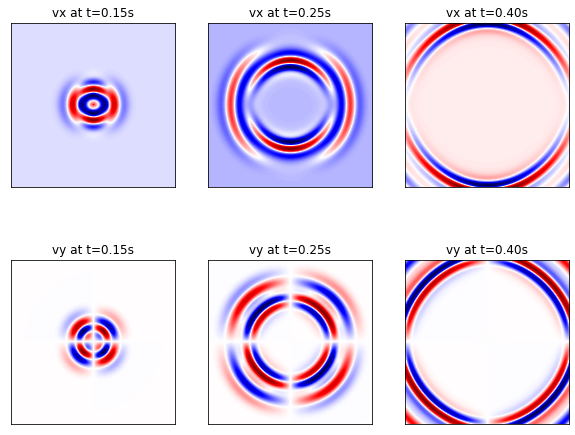

In [4]:
fig = plt.figure(figsize=(10, 8))
ll = len(save_nt)
for l in range(ll):
    ax = fig.add_subplot(2, ll, l+1)
    ax.imshow(vx[l][0], cmap=matplotlib.cm.seismic)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'vx at t={save_nt[l]*dt:.2f}s')
    ax = fig.add_subplot(2, ll, ll+l+1)
    ax.imshow(vy[l][0], cmap=matplotlib.cm.seismic)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'vy at t={save_nt[l]*dt:.2f}s')


In [ ]:
# fig.savefig('./elastic_homo_snapshots.png')

### Seismogram

In [15]:
h = 0.01
dt = 0.001
nx = nz = 200
rho = 2.0
vp = 4.7
vs = 3.5
nt = 500
f0 = 15
t0 = 1/15
sources_xz = np.array([
    [1, 100]
])
rx = np.arange(0, 200)
receivers_xz = np.zeros((200, 2), dtype=int)
receivers_xz[:, 0] = 2
receivers_xz[:, 1] = rx
sol = Solver(rho, vp, vs, nx, nz, h, dt, nt, t0, f0, sources_xz, receivers_xz)

sol.step()

In [16]:
seismogram_vx = sol.seismogram_vx[0].T
seismogram_vy = sol.seismogram_vy[0].T

[Text(0, 1, '0.0'),
 Text(40, 1, '0.4'),
 Text(80, 1, '0.8'),
 Text(120, 1, '1.2'),
 Text(160, 1, '1.6'),
 Text(200, 1, '2.0')]

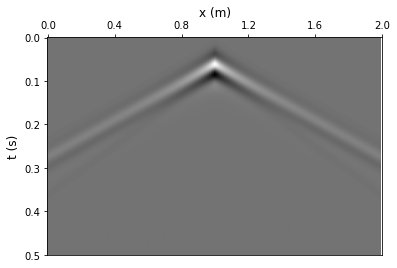

In [23]:
fig1 = plt.figure()
plt.imshow(seismogram_vx, aspect='auto', cmap='gray')
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('x (m)', fontsize=12)
ax.xaxis.set_label_position('top') 
ax.set_ylabel('t (s)', fontsize=12)
ax.set_yticks(np.arange(0, 501, 100))
ax.set_yticklabels(np.arange(0, 501, 100)*dt)
ax.set_xticks(np.arange(0, 201, 40))
ax.set_xticklabels(np.arange(0, 201, 40)*h)

[Text(0, 1, '0.0'),
 Text(40, 1, '0.4'),
 Text(80, 1, '0.8'),
 Text(120, 1, '1.2'),
 Text(160, 1, '1.6'),
 Text(200, 1, '2.0')]

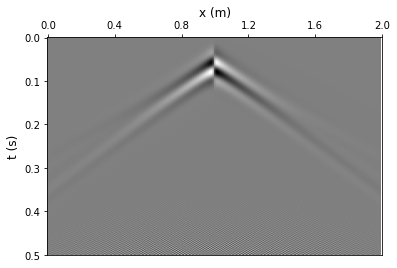

In [24]:
fig2 = plt.figure()
plt.imshow(seismogram_vy, aspect='auto', cmap='gray')
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('x (m)', fontsize=12)
ax.xaxis.set_label_position('top') 
ax.set_ylabel('t (s)', fontsize=12)
ax.set_yticks(np.arange(0, 501, 100))
ax.set_yticklabels(np.arange(0, 501, 100)*dt)
ax.set_xticks(np.arange(0, 201, 40))
ax.set_xticklabels(np.arange(0, 201, 40)*h)

In [27]:
fig1.savefig('./elastic_homo_seis_vx.png')
fig2.savefig('./elastic_homo_seis_vy.png')

## Heterogeneous
### Snapshots

### Seismogram